<a href="https://colab.research.google.com/github/waqarahmed6095/AudioDigitRecognition/blob/main/digitRecoginization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and installing required libraries

In [1]:
!pip install python_speech_features
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import urllib.request
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Downloading dataset

In [2]:
url = "https://github.com/Jakobovski/free-spoken-digit-dataset/archive/v1.0.9.tar.gz"

In [3]:
urllib.request.urlretrieve(url,"content")

('content', <http.client.HTTPMessage at 0x7fe87d8c1110>)

# Preprocessing dataset

In [4]:
!tar -xzvf content

free-spoken-digit-dataset-1.0.9/
free-spoken-digit-dataset-1.0.9/.gitignore
free-spoken-digit-dataset-1.0.9/README.md
free-spoken-digit-dataset-1.0.9/__init__.py
free-spoken-digit-dataset-1.0.9/acquire_data/
free-spoken-digit-dataset-1.0.9/acquire_data/say_numbers_prompt.py
free-spoken-digit-dataset-1.0.9/acquire_data/split_and_label_numbers.py
free-spoken-digit-dataset-1.0.9/metadata.py
free-spoken-digit-dataset-1.0.9/pip_requirements.txt
free-spoken-digit-dataset-1.0.9/recordings/
free-spoken-digit-dataset-1.0.9/recordings/0_george_0.wav
free-spoken-digit-dataset-1.0.9/recordings/0_george_1.wav
free-spoken-digit-dataset-1.0.9/recordings/0_george_10.wav
free-spoken-digit-dataset-1.0.9/recordings/0_george_11.wav
free-spoken-digit-dataset-1.0.9/recordings/0_george_12.wav
free-spoken-digit-dataset-1.0.9/recordings/0_george_13.wav
free-spoken-digit-dataset-1.0.9/recordings/0_george_14.wav
free-spoken-digit-dataset-1.0.9/recordings/0_george_15.wav
free-spoken-digit-dataset-1.0.9/recordings

# Accessing an example from dataset

In [5]:
IPython.display.Audio("/content/free-spoken-digit-dataset-1.0.9/recordings/0_george_0.wav")

In [6]:
(rate,sig) = wav.read("/content/free-spoken-digit-dataset-1.0.9/recordings/0_george_0.wav")
(rate,sig)

(8000, array([-1489,  -962,  -606, ..., -1814, -1110,   -15], dtype=int16))

In [7]:
mfcc_feat = mfcc(sig,rate)
mfcc_feat.shape

(29, 13)

In [8]:
mfcc_feat[0]

array([ 19.41454603, -13.45276802,  20.54129013,  -6.85462758,
       -39.59383592, -29.47122127,  -8.44648097, -30.39767098,
        -0.95463006,  21.11548559, -18.03290544,  11.48745775,
        -4.46203973])

In [9]:
feature_lists=[]
label_list = []
for filename in os.listdir("/content/free-spoken-digit-dataset-1.0.9/recordings"):
  (rate,sig) = wav.read("/content/free-spoken-digit-dataset-1.0.9/recordings/"+filename)
  label_list.append(filename[0])
  mfcc_feat = mfcc(sig,rate,numcep=13)
  mfcc_feat = np.mean(mfcc_feat.T,axis=1)
  feature_lists.append(np.array(mfcc_feat))
  

In [10]:
feature = np.array(feature_lists,dtype=object)
label = np.array(label_list,dtype=int)

In [11]:
print(feature.shape)
print(label.shape)


(2500, 13)
(2500,)


In [12]:
label[0:50]

array([6, 5, 8, 6, 2, 0, 6, 5, 2, 2, 1, 6, 5, 7, 4, 0, 5, 6, 3, 9, 9, 1,
       3, 1, 1, 7, 4, 2, 1, 7, 7, 7, 5, 2, 2, 7, 4, 9, 2, 3, 6, 2, 7, 2,
       5, 9, 0, 6, 7, 5])

In [13]:
feature[0]

array([11.847226557177798, -11.235920573511226, 13.586163369432922,
       -6.5834954641991255, -33.018985201227025, -4.877995664719148,
       -10.54016120924163, -8.158483712375954, 5.665289879152177,
       5.577261979535258, -4.960861496388312, -8.630018281638058,
       -3.074266286756312], dtype=object)

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,label,test_size=0.1) 

In [15]:
model = RandomForestClassifier()

In [16]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [17]:
model.score(X_train,Y_train)

1.0

In [18]:
predict = model.predict(X_test)

In [19]:
predict

array([7, 4, 0, 8, 5, 7, 2, 6, 2, 5, 6, 5, 9, 7, 2, 9, 6, 8, 9, 6, 4, 7,
       2, 5, 0, 6, 1, 6, 8, 2, 2, 3, 7, 4, 9, 7, 8, 4, 2, 2, 6, 6, 4, 1,
       2, 6, 8, 5, 7, 0, 5, 7, 6, 5, 2, 1, 3, 9, 6, 4, 3, 5, 0, 8, 4, 9,
       3, 6, 6, 1, 7, 4, 5, 8, 3, 3, 8, 8, 9, 4, 5, 9, 8, 4, 4, 6, 8, 8,
       2, 7, 8, 6, 7, 5, 9, 7, 1, 9, 6, 2, 6, 7, 2, 2, 8, 3, 0, 6, 5, 9,
       5, 1, 8, 4, 3, 7, 4, 5, 5, 1, 5, 2, 8, 2, 4, 3, 1, 9, 0, 9, 6, 0,
       3, 7, 2, 6, 3, 4, 3, 1, 7, 0, 5, 2, 2, 1, 1, 9, 2, 8, 1, 4, 6, 9,
       1, 6, 0, 1, 3, 0, 1, 5, 7, 2, 7, 4, 0, 0, 2, 1, 2, 0, 0, 9, 3, 0,
       5, 2, 3, 1, 3, 4, 1, 5, 9, 6, 3, 5, 1, 4, 8, 1, 2, 1, 8, 7, 0, 9,
       4, 5, 0, 6, 8, 6, 0, 2, 0, 9, 6, 2, 3, 3, 0, 3, 3, 1, 1, 7, 9, 0,
       6, 6, 9, 9, 8, 3, 7, 5, 1, 0, 5, 9, 4, 7, 2, 8, 8, 7, 5, 2, 1, 9,
       3, 1, 0, 6, 5, 2, 7, 4])

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
logistic = confusion_matrix(Y_test,predict)

In [22]:
model_logistic = LogisticRegression()
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_linearsvc = LinearSVC()
model_gauuss = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

In [23]:
model_logistic.fit(X_train,Y_train)
model_tree.fit(X_train,Y_train)
model_forest.fit(X_train,Y_train)
model_linearsvc.fit(X_train,Y_train)
model_gauuss.fit(X_train,Y_train)
mlp.fit(X_train,Y_train)
mlp1.fit(X_train,Y_train)
mlp2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_mult

MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [24]:
logistic_score = model_logistic.score(X_train,Y_train)
tree_score =  model_tree.score(X_train,Y_train)
forest_score =  model_forest.score(X_train,Y_train)
linearsvc_score =  model_linearsvc.score(X_train,Y_train)
gauss_score = model_gauuss.score(X_train,Y_train)
mlp_score = mlp.score(X_train,Y_train)
mlp1_score = mlp2.score(X_train,Y_train)
mlp2_score = mlp2.score(X_train,Y_train)

In [25]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression','Decision Tree','Random Forest','Support Vector Machines',  
               'Naive Bayes', 'mlp-1-layer','mlp-100layers','mlp-1000-layers' 
              ],
    'Score': [logistic_score, tree_score, forest_score, 
              linearsvc_score, gauss_score, mlp_score, 
              mlp1_score, mlp2_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
1.000000,Decision Tree
1.000000,Random Forest
0.999556,mlp-100layers
0.999556,mlp-1000-layers
0.876444,Logistic Regression
0.804444,Naive Bayes
0.688889,Support Vector Machines
0.199111,mlp-1-layer


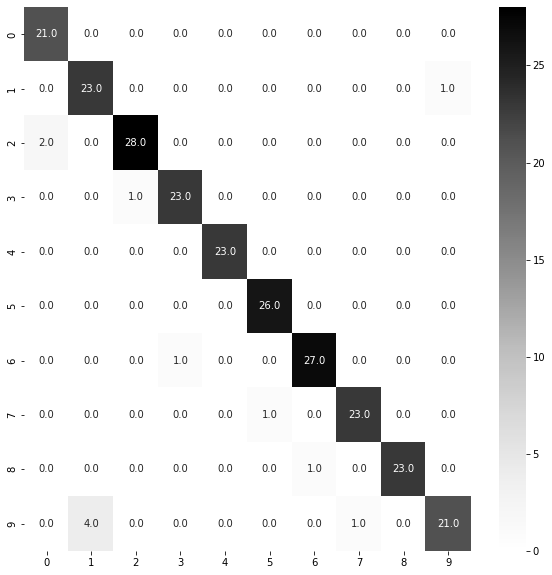

In [26]:
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test,model_forest.predict(X_test)),annot=True,ax=axs,fmt='.1f',cmap='Greys')

In [27]:
print(classification_report(Y_test,model_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.85      0.96      0.90        24
           2       0.97      0.93      0.95        30
           3       0.96      0.96      0.96        24
           4       1.00      1.00      1.00        23
           5       0.96      1.00      0.98        26
           6       0.96      0.96      0.96        28
           7       0.96      0.96      0.96        24
           8       1.00      0.96      0.98        24
           9       0.95      0.81      0.88        26

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [28]:
predict_logistic= model_logistic.predict(X_test)
predict_tree = model_tree.predict(X_test)
predict_forest = model_forest.predict(X_test)
predict_svmlinear = model_linearsvc.predict(X_test)
predict_gauss = model_gauuss.predict(X_test)
predictions_NN = mlp.predict(X_test)
predictions_NN1 = mlp1.predict(X_test)
predictions_NN2 = mlp2.predict(X_test)

In [29]:
print("Logistic Regression")
print(classification_report(Y_test,predict_logistic))
print("tree")
print( classification_report(Y_test,predict_tree))
print("forest")
print( classification_report(Y_test,predict_forest))
print("svm")
print(classification_report(Y_test,predict_svmlinear))
print("gauss")
print(classification_report(Y_test,predict_gauss))
print("NN")
print(classification_report(Y_test,predictions_NN))
print("NN1")
print(classification_report(Y_test,predictions_NN1))
print("NN2")
print(classification_report(Y_test,predictions_NN2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.81      0.88      0.84        24
           2       0.89      0.80      0.84        30
           3       0.81      0.92      0.86        24
           4       0.88      0.96      0.92        23
           5       0.88      0.88      0.88        26
           6       0.86      0.86      0.86        28
           7       0.88      0.88      0.88        24
           8       0.88      0.96      0.92        24
           9       0.86      0.73      0.79        26

    accuracy                           0.86       250
   macro avg       0.85      0.86      0.85       250
weighted avg       0.86      0.86      0.85       250

tree
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.78      0.88      0.82        24
           2       0.79      0.77      0.78        30

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat